
# Predicting Divorce: A Data-Driven Analysis of Marital Relationships


## Setup and Data Loading

In [84]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [86]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8')  # or you can use 'seaborn-darkgrid'
sns.set_theme()
sns.set_palette("husl")
# Read the data
df = pd.read_csv('divorce.csv', sep=';')

# Create a dictionary for column renaming
column_names = {
    'Atr1': 'Apology_Effectiveness',
    'Atr2': 'Handling_Differences',
    'Atr3': 'Discussion_Reset',
    'Atr4': 'Argument_Contact',
    'Atr5': 'Quality_Time',
    'Atr6': 'Shared_Time_Home',
    'Atr7': 'Home_Environment',
    'Atr8': 'Holiday_Enjoyment',
    'Atr9': 'Travel_Enjoyment',
    'Atr10': 'Common_Goals',
    'Atr11': 'Future_Harmony',
    'Atr12': 'Personal_Freedom',
    'Atr13': 'Similar_Entertainment',
    'Atr14': 'Social_Goals',
    'Atr15': 'Life_Dreams',
    'Atr16': 'Love_Agreement',
    'Atr17': 'Happiness_Views',
    'Atr18': 'Marriage_Views',
    'Atr19': 'Role_Agreement',
    'Atr20': 'Trust_Values',
    'Atr21': 'Partner_Likes',
    'Atr22': 'Care_Knowledge',
    'Atr23': 'Food_Preferences',
    'Atr24': 'Stress_Understanding',
    'Atr25': 'Inner_World',
    'Atr26': 'Basic_Concerns',
    'Atr27': 'Current_Stress',
    'Atr28': 'Hopes_Wishes',
    'Atr29': 'Overall_Knowledge',
    'Atr30': 'Social_Network',
    'Atr31': 'Argument_Aggression',
    'Atr32': 'Absolute_Terms',
    'Atr33': 'Negative_Personality',
    'Atr34': 'Offensive_Speech',
    'Atr35': 'Insulting_Discussion',
    'Atr36': 'Humiliating_Behavior',
    'Atr37': 'Argument_Calmness',
    'Atr38': 'Discussion_Style',
    'Atr39': 'Sudden_Fights',
    'Atr40': 'Fight_Awareness',
    'Atr41': 'Calm_Breaking',
    'Atr42': 'Silent_Treatment',
    'Atr43': 'Calming_Desire',
    'Atr44': 'Leaving_Desire',
    'Atr45': 'Silence_Preference',
    'Atr46': 'Conflict_Avoidance',
    'Atr47': 'Anger_Control',
    'Atr48': 'Discussion_Rightness',
    'Atr49': 'Accusation_Defense',
    'Atr50': 'Guilt_Denial',
    'Atr51': 'Home_Blame',
    'Atr52': 'Partner_Inadequacy',
    'Atr53': 'Inadequacy_Discussion',
    'Atr54': 'Incompetence_Expression'
}

# Rename the columns
df = df.rename(columns=column_names)

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst few rows of the dataset:")
df.head()

## Data Preprocessing and Initial Analysis

# Check for missing values
print("\nMissing values in each column:")
df.isnull().sum()

# Display basic statistics
print("\nBasic statistics of the dataset:")
df.describe()

# Check class distribution
print("\nClass distribution (0: Not Divorced, 1: Divorced):")
df['Class'].value_counts()


Dataset Shape: (170, 55)

First few rows of the dataset:

Missing values in each column:

Basic statistics of the dataset:

Class distribution (0: Not Divorced, 1: Divorced):


Class
0    86
1    84
Name: count, dtype: int64

In [88]:
print("Dataset info:")
df.info()

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Apology_Effectiveness    170 non-null    int64
 1   Handling_Differences     170 non-null    int64
 2   Discussion_Reset         170 non-null    int64
 3   Argument_Contact         170 non-null    int64
 4   Quality_Time             170 non-null    int64
 5   Shared_Time_Home         170 non-null    int64
 6   Home_Environment         170 non-null    int64
 7   Holiday_Enjoyment        170 non-null    int64
 8   Travel_Enjoyment         170 non-null    int64
 9   Common_Goals             170 non-null    int64
 10  Future_Harmony           170 non-null    int64
 11  Personal_Freedom         170 non-null    int64
 12  Similar_Entertainment    170 non-null    int64
 13  Social_Goals             170 non-null    int64
 14  Life_Dreams              170 non-null    int

## Analysis Question 1: Communication Patterns

<Figure size 1200x600 with 0 Axes>

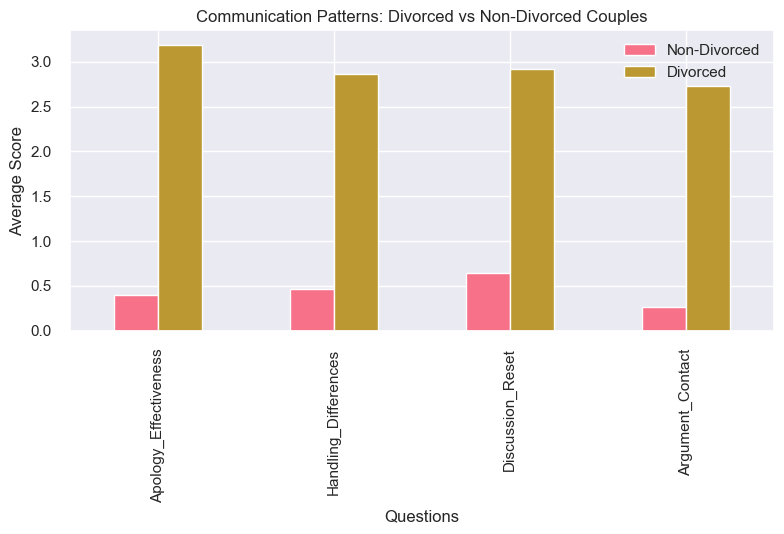

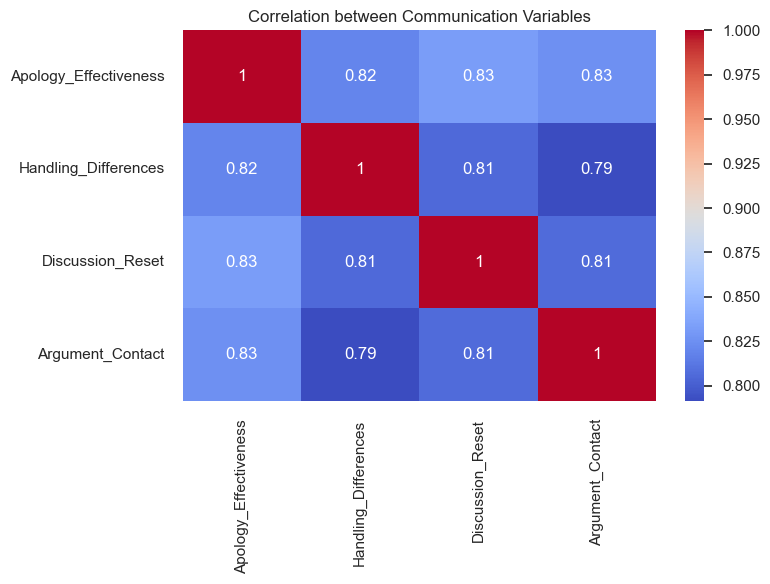

In [91]:
# Select communication-related questions
comm_cols = ['Apology_Effectiveness', 'Handling_Differences', 
             'Discussion_Reset', 'Argument_Contact']

# Calculate mean scores for each group
comm_patterns = df.groupby('Class')[comm_cols].mean()

# Visualization
plt.figure(figsize=(12, 6))
comm_patterns.T.plot(kind='bar')
plt.title('Communication Patterns: Divorced vs Non-Divorced Couples')
plt.xlabel('Questions')
plt.ylabel('Average Score')
plt.legend(['Non-Divorced', 'Divorced'])
plt.tight_layout()
plt.show()

# Calculate correlation between communication variables
comm_corr = df[comm_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(comm_corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Communication Variables')
plt.tight_layout()
plt.show()

## Analysis Question 2: Shared Time and Values

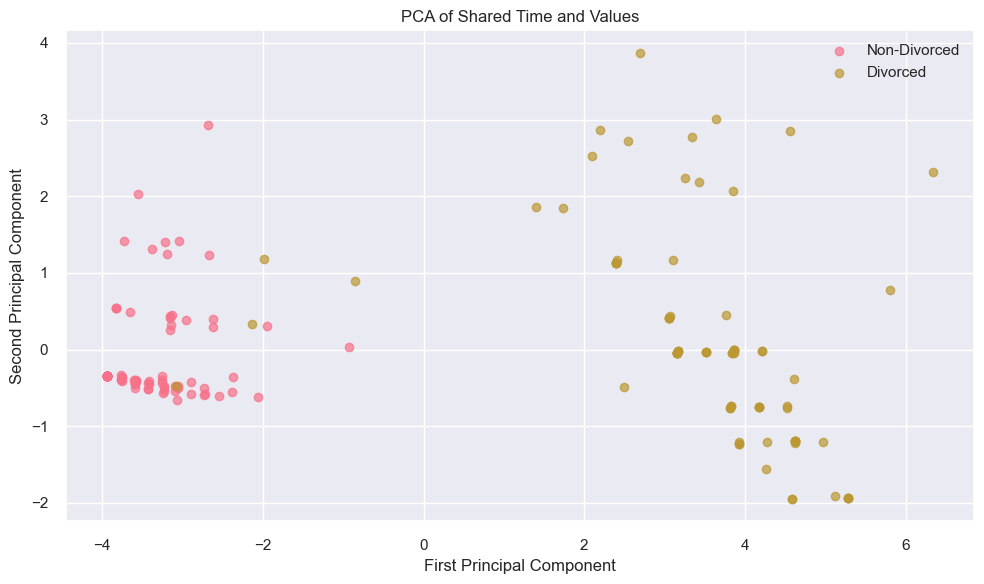


Explained variance ratio: [0.80773825 0.06997088]


In [94]:


# Select shared time and values questions
shared_cols = ['Quality_Time', 'Shared_Time_Home', 'Home_Environment',
               'Holiday_Enjoyment', 'Travel_Enjoyment', 'Common_Goals',
               'Future_Harmony', 'Personal_Freedom', 'Similar_Entertainment',
               'Social_Goals', 'Life_Dreams', 'Love_Agreement',
               'Happiness_Views', 'Marriage_Views', 'Role_Agreement',
               'Trust_Values']
shared_data = df[shared_cols]

# Perform PCA
scaler = StandardScaler()
shared_scaled = scaler.fit_transform(shared_data)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(shared_scaled)

# Create PCA visualization
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[df['Class']==0, 0], pca_result[df['Class']==0, 1], 
            label='Non-Divorced', alpha=0.7)
plt.scatter(pca_result[df['Class']==1, 0], pca_result[df['Class']==1, 1], 
            label='Divorced', alpha=0.7)
plt.title('PCA of Shared Time and Values')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.tight_layout()
plt.show()

# Explained variance ratio
print("\nExplained variance ratio:", pca.explained_variance_ratio_)

## Analysis Question 3: Conflict Behavior Patterns

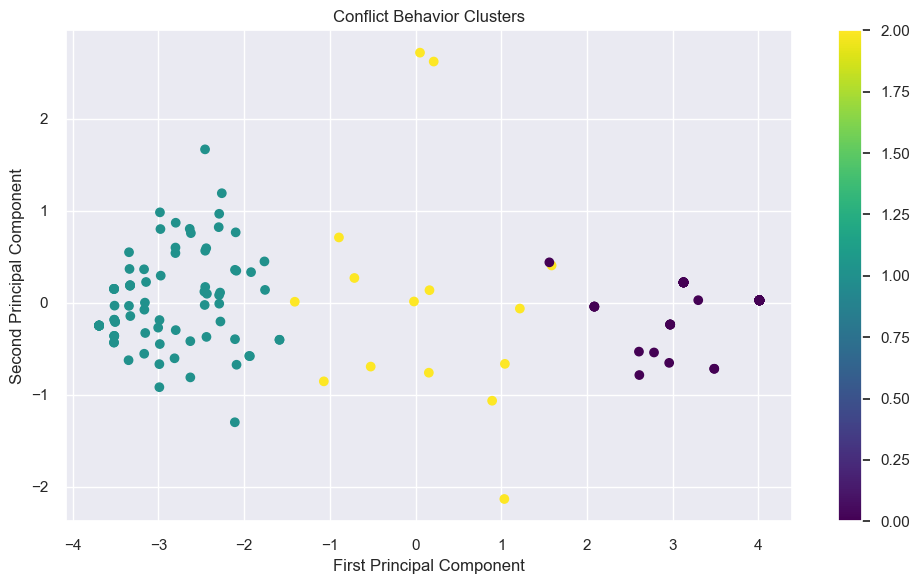


Cluster sizes:
1    85
0    70
2    15
Name: count, dtype: int64


In [97]:

# Select conflict-related questions
conflict_cols = ['Argument_Aggression', 'Absolute_Terms', 'Negative_Personality',
                'Offensive_Speech', 'Insulting_Discussion', 'Humiliating_Behavior',
                'Argument_Calmness', 'Discussion_Style', 'Sudden_Fights',
                'Fight_Awareness', 'Calm_Breaking']
conflict_data = df[conflict_cols]

# Perform clustering
conflict_scaled = StandardScaler().fit_transform(conflict_data)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(conflict_scaled)

# Add cluster labels to the dataframe
df['Conflict_Cluster'] = clusters

# Visualize clusters using PCA
pca_conflict = PCA(n_components=2)
conflict_pca = pca_conflict.fit_transform(conflict_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(conflict_pca[:, 0], conflict_pca[:, 1], 
                     c=clusters, cmap='viridis')
plt.title('Conflict Behavior Clusters')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter)
plt.tight_layout()
plt.show()

# Analyze cluster characteristics
print("\nCluster sizes:")
print(pd.Series(clusters).value_counts())


## Analysis Question 4: Divorce Prediction Model


Model Performance:
Accuracy Score: 97.06%

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.95      0.97        20

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34



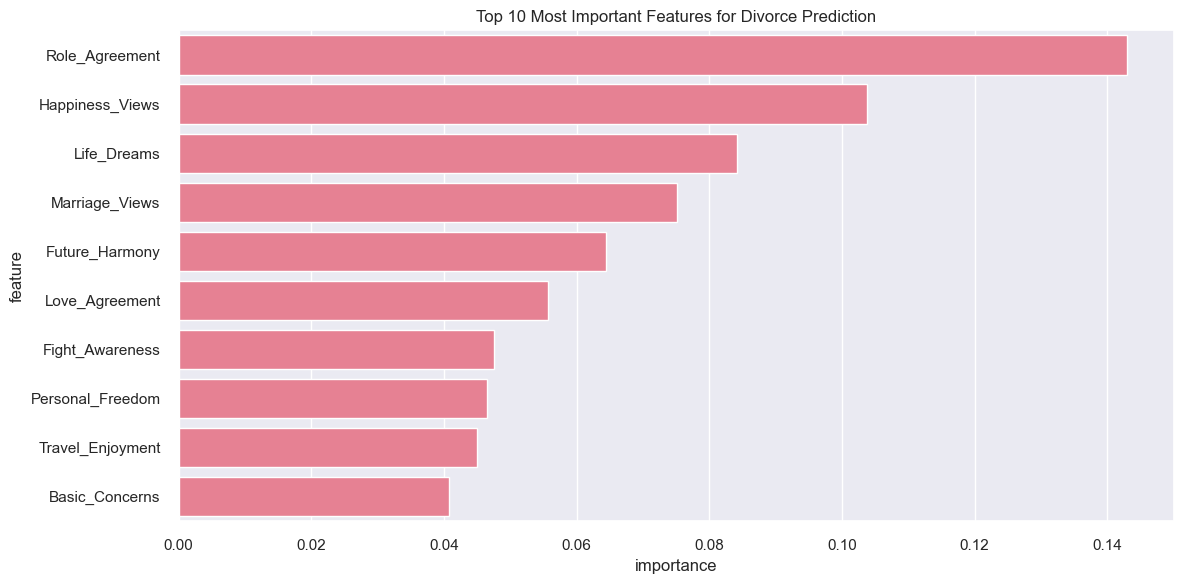

In [100]:
# Prepare features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and get accuracy
y_pred = rf_model.predict(X_test)
accuracy = rf_model.score(X_test, y_test)

print("\nModel Performance:")
print(f"Accuracy Score: {accuracy:.2%}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features for Divorce Prediction')
plt.tight_layout()
plt.show()


## Analysis Question 5: Partner Knowledge


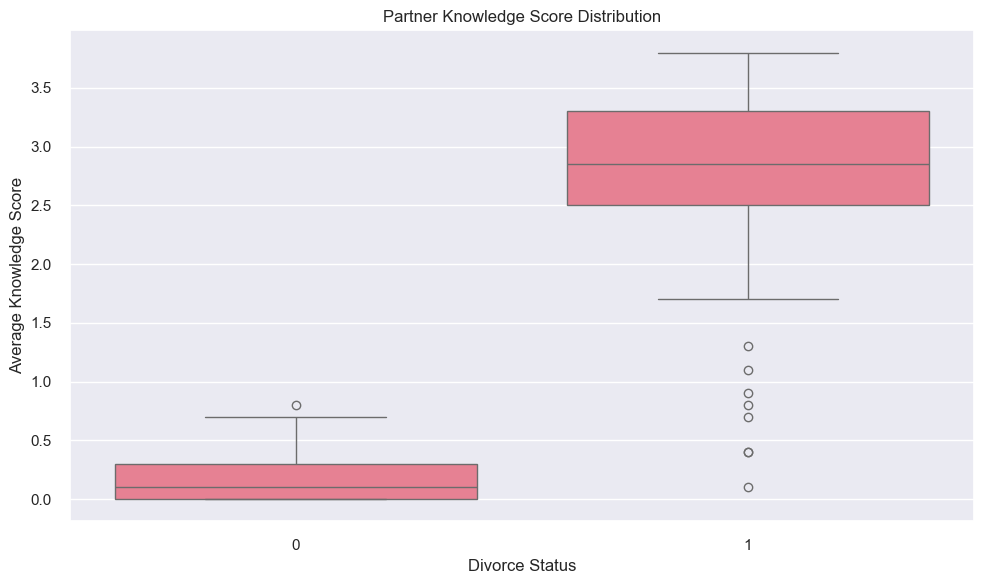


Partner Knowledge Score Statistics:
       count      mean       std  min  25%   50%  75%  max
Class                                                     
0       86.0  0.162791  0.194662  0.0  0.0  0.10  0.3  0.8
1       84.0  2.741667  0.820844  0.1  2.5  2.85  3.3  3.8

Key Findings:
1. Communication Pattern Differences:
       Apology_Effectiveness  Handling_Differences  Discussion_Reset  \
Class                                                                  
0                       0.40                  0.47              0.64   
1                       3.19                  2.87              2.92   

       Argument_Contact  
Class                    
0                  0.27  
1                  2.73  

2. Model Accuracy: 97.06 %

3. Top 3 Most Important Features:
        feature  importance
 Role_Agreement    0.142930
Happiness_Views    0.103788
    Life_Dreams    0.084252

4. Knowledge Score Difference Between Groups:
Class
0    0.16
1    2.74
Name: knowledge_score, dtype: flo

In [103]:
# Select partner knowledge questions
knowledge_cols = ['Partner_Likes', 'Care_Knowledge', 'Food_Preferences',
                 'Stress_Understanding', 'Inner_World', 'Basic_Concerns',
                 'Current_Stress', 'Hopes_Wishes', 'Overall_Knowledge',
                 'Social_Network']

# Calculate knowledge score
df['knowledge_score'] = df[knowledge_cols].mean(axis=1)

# Create visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='knowledge_score', data=df)
plt.title('Partner Knowledge Score Distribution')
plt.xlabel('Divorce Status')
plt.ylabel('Average Knowledge Score')
plt.tight_layout()
plt.show()

# Statistical summary
print("\nPartner Knowledge Score Statistics:")
print(df.groupby('Class')['knowledge_score'].describe())

## Conclusions

# Calculate and display key findings
print("\nKey Findings:")
print("1. Communication Pattern Differences:")
print(comm_patterns.round(2))

print("\n2. Model Accuracy:", 
      round(rf_model.score(X_test, y_test) * 100, 2), "%")

print("\n3. Top 3 Most Important Features:")
print(feature_importance.head(3).to_string(index=False))

print("\n4. Knowledge Score Difference Between Groups:")
print(df.groupby('Class')['knowledge_score'].mean().round(2))

## Conclusions

In [106]:

# Calculate and display key findings
print("\nKey Findings:")
print("1. Communication Pattern Differences:")
print(comm_patterns.round(2))

print("\n2. Model Accuracy:", 
      round(rf_model.score(X_test, y_test) * 100, 2), "%")

print("\n3. Top 3 Most Important Features:")
print(feature_importance.head(3).to_string(index=False))

print("\n4. Knowledge Score Difference Between Groups:")
print(df.groupby('Class')['knowledge_score'].mean().round(2))


Key Findings:
1. Communication Pattern Differences:
       Apology_Effectiveness  Handling_Differences  Discussion_Reset  \
Class                                                                  
0                       0.40                  0.47              0.64   
1                       3.19                  2.87              2.92   

       Argument_Contact  
Class                    
0                  0.27  
1                  2.73  

2. Model Accuracy: 97.06 %

3. Top 3 Most Important Features:
        feature  importance
 Role_Agreement    0.142930
Happiness_Views    0.103788
    Life_Dreams    0.084252

4. Knowledge Score Difference Between Groups:
Class
0    0.16
1    2.74
Name: knowledge_score, dtype: float64
